T = 23 C

Lenses labeled A, B, D, E, and M

M is convex on one side and flat on other, and all the others are convex on both sides.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [13]:
#spherometer
linde = 25.5 #mm
lindf = 25.5 #mm
linef = 25.5 #mm

In [14]:
#estimate focal length from ceiling light
aestfl = 46 #mm
bestfl = 96 #mm
destfl = 198 #mm
eestfl = 215 #mm
mestfl = 145 #mm

In [15]:
#estimate focal length from laser light
lightloc = 1150 #mm
amesfl = 750 - 683 #mm
bmesfl = 750 - 615 #mm
dmesfl = 450 - 160 #mm
emesfl = 450 - -65 #mm
mmesfl = 750 - 503 #mm

In [16]:
#measured focal length from spherometer
base = 20.090 #mm
spherometererror = .005 #mm
afl = 21.575 #mm
bfl = 21.135 #mm
dfl = 20.525 #mm
efl = 20.390 #mm
mfl = 21.580 #mm

In [17]:
fls = [afl, bfl, dfl, efl, mfl]

In [32]:
calcr = [linde**2/6/(fl-base) + (fl-base)/2 for fl in fls]

In [47]:
calcfl = 1/((1.52-1)*2/np.array((calcr)))

In [48]:
calcfl[-2]+calcfl[0]

418.38682498057415

In [49]:
calcfl

array([  70.88682498,  100.22176343,  239.76483753,  347.5       ,
         70.65374935])

In [50]:
whos

Variable           Type           Data/Info
-------------------------------------------
aestfl             int            46
afl                float          21.575
amesfl             int            67
ax                 AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
base               float          20.09
bestfl             int            96
bfl                float          21.135
bmesfl             int            135
calcfl             ndarray        5: 5 elems, type `float64`, 40 bytes
calcr              list           n=5
data               DataFrame        lens  ceiling  laser sp<...>  145    247          NaN
destfl             int            198
dfl                float          20.525
dmesfl             int            290
eestfl             int            215
efl                float          20.39
emesfl             int            515
fig                Figure         Figure(288x216)
fls                list           n=5
lightloc           int            1150
linde      

In [60]:
calcfl = [a for a in calcfl]

In [66]:
data = pd.DataFrame({'lens': ['A', 'B', 'D', 'E', 'M'], 'ceiling': [aestfl, bestfl, destfl, eestfl, mestfl],
                     'laser': [amesfl, bmesfl, dmesfl, emesfl, mmesfl], 'spherometer': calcfl},
                    columns=['lens', 'ceiling', 'laser', 'spherometer'])

In [67]:
data

,lens,ceiling,laser,spherometer
0,A,46,67,70.886825
1,B,96,135,100.221763
2,D,198,290,239.764838
3,E,215,515,347.500000
4,M,145,247,70.653749


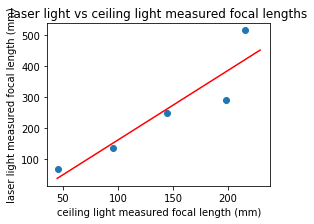

In [93]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
x = data['ceiling']
y = data['laser']
ax.scatter(x, y)
ax.set_xlabel('ceiling light measured focal length (mm)')
ax.set_ylabel('laser light measured focal length (mm)')
ax.set_title('laser light vs ceiling light measured focal lengths')
m,b = np.polyfit(x, y, 1)
t = np.arange(45, 230)
v = m*t +b
ax.plot(t, v, c=(1,0,0))
ax.figure.savefig('lab6-lc')

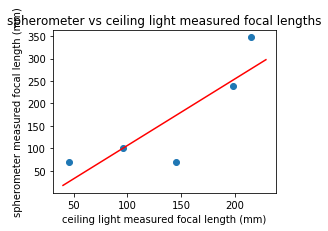

In [94]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
x = data['ceiling']
y = data['spherometer']
ax.scatter(x, y)
ax.set_xlabel('ceiling light measured focal length (mm)')
ax.set_ylabel('spherometer measured focal length (mm)')
ax.set_title('spherometer vs ceiling light measured focal lengths')

m,b = np.polyfit(x, y, 1)
t = np.arange(40, 230)
v = m*t +b
ax.plot(t, v, c=(1,0,0))
ax.figure.savefig('lab6-sc')

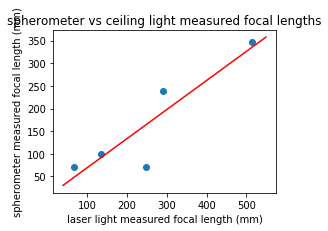

In [95]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
x = data['laser']
y = data['spherometer']
ax.scatter(x, y)
ax.set_xlabel('laser light measured focal length (mm)')
ax.set_ylabel('spherometer measured focal length (mm)')
ax.set_title('spherometer vs ceiling light measured focal lengths')

m,b = np.polyfit(x, y, 1)
t = np.arange(40, 550)
v = m*t +b
ax.plot(t, v, c=(1,0,0))
ax.figure.savefig('lab6-sl')

In [97]:
o = 75
oerr = 1
i = 440
ierr = 100
M = i/o

In [177]:
M

5.866666666666666

In [109]:
Ms = [{'eye '+data['lens'][j]:[{'objective '+data['lens'][i]:fo/fe for i, fe in enumerate(calcfl)}]
      for j, fo in enumerate(calcfl)}]

In [110]:
Ms

[{'eye A': [{'objective A': 1.0,
    'objective B': 0.70729971766365152,
    'objective D': 0.29565146294969974,
    'objective E': 0.20399086325345378,
    'objective M': 1.0032988429917957}],
  'eye B': [{'objective A': 1.4138277946769078,
    'objective B': 1.0,
    'objective D': 0.41800025585517553,
    'objective E': 0.28840795232786925,
    'objective M': 1.4184917905889838}],
  'eye D': [{'objective A': 3.3823610748380895,
    'objective B': 2.3923430332695053,
    'objective D': 1.0,
    'objective E': 0.68997075549110165,
    'objective M': 3.3935189529655418}],
  'eye E': [{'objective A': 4.9021803430358739,
    'objective B': 3.4673107725655758,
    'objective D': 1.449336790061817,
    'objective E': 1.0,
    'objective M': 4.9183518663050165}],
  'eye M': [{'objective A': 0.99671200359211143,
    'objective B': 0.70497411873267279,
    'objective D': 0.29467936200153416,
    'objective E': 0.20332014202783433,
    'objective M': 1.0}]}]

In [164]:
aeye = {'objective '+data['lens'][i]:fo/data['spherometer'][0] for i, fo in enumerate(data['spherometer'])}
beye = {'objective '+data['lens'][i]:fo/data['spherometer'][1] for i, fo in enumerate(data['spherometer'])}
deye = {'objective '+data['lens'][i]:fo/data['spherometer'][2] for i, fo in enumerate(data['spherometer'])}
eeye = {'objective '+data['lens'][i]:fo/data['spherometer'][3] for i, fo in enumerate(data['spherometer'])}
meye = {'objective '+data['lens'][i]:fo/data['spherometer'][4] for i, fo in enumerate(data['spherometer'])}
Ms = pd.DataFrame({'eye A':aeye, 'eye B':beye, 'eye D':deye,'eye E':eeye, 'eye M':meye})

/home/kreidy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  import sys


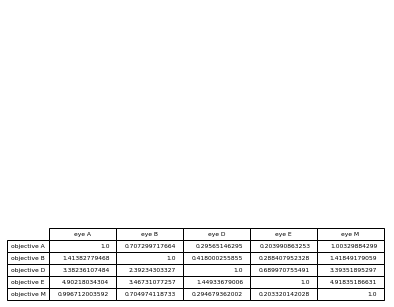

In [165]:
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, Ms)  # where df is your data frame

plt.savefig('lab6-Ms.png')

In [166]:
Ms

,eye A,eye B,eye D,eye E,eye M
objective A,1.000000,0.707300,0.295651,0.203991,1.003299
objective B,1.413828,1.000000,0.418000,0.288408,1.418492
objective D,3.382361,2.392343,1.000000,0.689971,3.393519
objective E,4.902180,3.467311,1.449337,1.000000,4.918352
objective M,0.996712,0.704974,0.294679,0.203320,1.000000


In [167]:
M

5.866666666666666

In [168]:
aeye = {'objective '+data['lens'][i]:fo/data['ceiling'][0] for i, fo in enumerate(data['ceiling'])}
beye = {'objective '+data['lens'][i]:fo/data['ceiling'][1] for i, fo in enumerate(data['ceiling'])}
deye = {'objective '+data['lens'][i]:fo/data['ceiling'][2] for i, fo in enumerate(data['ceiling'])}
eeye = {'objective '+data['lens'][i]:fo/data['ceiling'][3] for i, fo in enumerate(data['ceiling'])}
meye = {'objective '+data['lens'][i]:fo/data['ceiling'][4] for i, fo in enumerate(data['ceiling'])}
Mc = pd.DataFrame({'eye A':aeye, 'eye B':beye, 'eye D':deye,'eye E':eeye, 'eye M':meye})

/home/kreidy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  import sys


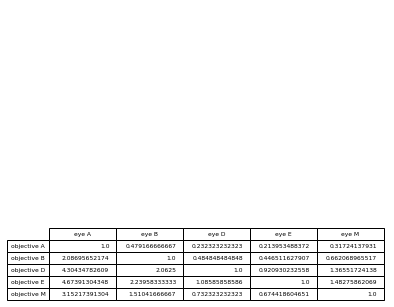

In [169]:
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, Mc)  # where df is your data frame

plt.savefig('lab6-Mc.png')

In [170]:
Mc

,eye A,eye B,eye D,eye E,eye M
objective A,1.000000,0.479167,0.232323,0.213953,0.317241
objective B,2.086957,1.000000,0.484848,0.446512,0.662069
objective D,4.304348,2.062500,1.000000,0.920930,1.365517
objective E,4.673913,2.239583,1.085859,1.000000,1.482759
objective M,3.152174,1.510417,0.732323,0.674419,1.000000


In [171]:
aeye = {'objective '+data['lens'][i]:fo/data['laser'][0] for i, fo in enumerate(data['laser'])}
beye = {'objective '+data['lens'][i]:fo/data['laser'][1] for i, fo in enumerate(data['laser'])}
deye = {'objective '+data['lens'][i]:fo/data['laser'][2] for i, fo in enumerate(data['laser'])}
eeye = {'objective '+data['lens'][i]:fo/data['laser'][3] for i, fo in enumerate(data['laser'])}
meye = {'objective '+data['lens'][i]:fo/data['laser'][4] for i, fo in enumerate(data['laser'])}
Ml = pd.DataFrame({'eye A':aeye, 'eye B':beye, 'eye D':deye,'eye E':eeye, 'eye M':meye})

/home/kreidy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  import sys


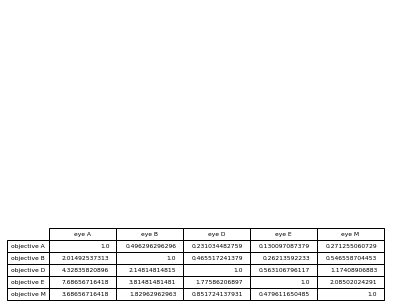

In [172]:
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, Ml)  # where df is your data frame

plt.savefig('lab6-Ml.png')

In [173]:
Ml

,eye A,eye B,eye D,eye E,eye M
objective A,1.000000,0.496296,0.231034,0.130097,0.271255
objective B,2.014925,1.000000,0.465517,0.262136,0.546559
objective D,4.328358,2.148148,1.000000,0.563107,1.174089
objective E,7.686567,3.814815,1.775862,1.000000,2.085020
objective M,3.686567,1.829630,0.851724,0.479612,1.000000


In [176]:
print('spherometer mag st dev:', np.std((Ms['eye A'][3], M)))
print('ceiling mag st dev:', np.std((Mc['eye A'][3], M)))
print('lamp/laser mag st dev:', np.std((Ml['eye A'][3], M)))

spherometer mag st dev: 0.482243161815
ceiling mag st dev: 0.596376811594
lamp/laser mag st dev: 0.909950248756


In [175]:
data

,lens,ceiling,laser,spherometer
0,A,46,67,70.886825
1,B,96,135,100.221763
2,D,198,290,239.764838
3,E,215,515,347.500000
4,M,145,247,70.653749


In [155]:
np.

<module 'numpy' from '/home/kreidy/anaconda3/lib/python3.6/site-packages/numpy/__init__.py'>